# K-Means algorithm implementation for Customer Segmentation

## Intall packages

In [1]:
!pip install numpy
!pip install Pandas
!pip install matplotlib

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Read data from csv exported from Database - *name file as final_points.csv

In [81]:
# Importing the dataset
supplier = pd.read_csv('sup_seg_1500.csv')

print('First look at the data set: ')
print(supplier.head())

First look at the data set: 
                           Companyname  Companyid  \
0            distripark.com Sp. z o.o.       1420   
1                    Same Chemicals BV       1286   
2        Chemische Fabrik Budenheim KG       7036   
3  Preparados Quimicos De Navarra S.L.        435   
4                            OOO SIBUR       1380   

  business_development_manager  page_views    offers    orders  \
0            Oksana Senchyshyn    1.000000  1.000000  0.118182   
1                Juan Alvarado    0.147317  0.578588  0.400000   
2               Florian Pagels    0.028130  0.161731  1.000000   
3                Juan Alvarado    0.499053  0.956720  0.445455   
4            Oksana Senchyshyn    0.173834  0.000000  0.000000   

   company_reply_rate  product_completness  total_order_value_in_euro  \
0            1.000000             0.727442                   0.048541   
1            0.558600             0.563014                   0.545682   
2            1.000000             0.

## Normalizing data between 0-1 range

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans  
from pandas import DataFrame

data = DataFrame(supplier, columns=['page_views','offers', 'orders','company_reply_rate', 'product_completness', 'total_order_value_in_euro', 'monetize_amount','wootric_score'])

scaler = MinMaxScaler()
scaler.fit(data)
minmaxdata = scaler.transform(data)
df =pd.DataFrame(data=minmaxdata, columns=['page_views','offers', 'orders','company_reply_rate', 'product_completness', 'total_order_value_in_euro', 'monetize_amount','wootric_score'])
df.to_csv('normalizedValues.csv',index=False)

In [82]:
# Importing the dataset
supplier = pd.read_csv('sup_seg_1500.csv')

print('First look at the data set: ')
print(supplier.head())

First look at the data set: 
                           Companyname  Companyid  \
0            distripark.com Sp. z o.o.       1420   
1                    Same Chemicals BV       1286   
2        Chemische Fabrik Budenheim KG       7036   
3  Preparados Quimicos De Navarra S.L.        435   
4                            OOO SIBUR       1380   

  business_development_manager  page_views    offers    orders  \
0            Oksana Senchyshyn    1.000000  1.000000  0.118182   
1                Juan Alvarado    0.147317  0.578588  0.400000   
2               Florian Pagels    0.028130  0.161731  1.000000   
3                Juan Alvarado    0.499053  0.956720  0.445455   
4            Oksana Senchyshyn    0.173834  0.000000  0.000000   

   company_reply_rate  product_completness  total_order_value_in_euro  \
0            1.000000             0.727442                   0.048541   
1            0.558600             0.563014                   0.545682   
2            1.000000             0.

In [83]:
from sklearn.cluster import KMeans  
from pandas import DataFrame
data = DataFrame(supplier, columns=['page_views','offers', 'orders','company_reply_rate', 'product_completness',
                                    'total_order_value_in_euro', 'monetize_amount','wootric_score'
                                    ,'Groups on Final Points'])

page_views = data['page_views']
offers =data['offers']
orders = data['orders']
company_reply_rate =data['company_reply_rate']
product_completness =data['product_completness']
total_order_value_in_euro =data['total_order_value_in_euro']
monetize_amount =data['monetize_amount']
wootric_score =data['wootric_score']

print('First look at the data set: ')
print(data.head())

First look at the data set: 
   page_views    offers    orders  company_reply_rate  product_completness  \
0    1.000000  1.000000  0.118182            1.000000             0.727442   
1    0.147317  0.578588  0.400000            0.558600             0.563014   
2    0.028130  0.161731  1.000000            1.000000             0.736765   
3    0.499053  0.956720  0.445455            0.772414             0.724715   
4    0.173834  0.000000  0.000000            0.979592             0.661244   

   total_order_value_in_euro  monetize_amount  wootric_score  \
0                   0.048541             0.00            1.0   
1                   0.545682             0.00            0.8   
2                   1.000000             0.00            0.0   
3                   0.057758             0.08            0.0   
4                   0.000000             1.00            0.0   

   Groups on Final Points  
0                       0  
1                       0  
2                       0  
3    

## Zipping data in numpy array

In [84]:
points_data = np.array(list(zip(page_views, offers,orders,company_reply_rate,
                                product_completness,total_order_value_in_euro,monetize_amount,wootric_score)))
#print(points_data)
print(points_data)

[[1.         1.         0.11818182 ... 0.04854141 0.         1.        ]
 [0.14731673 0.5785877  0.4        ... 0.54568249 0.         0.8       ]
 [0.02813048 0.16173121 1.         ... 1.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Clustering data with K-means algorithm and exporting data in ClusteredTestIteration.csv file - 2 Clusters

In [85]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++',n_init=1000, max_iter=10000, tol=0.0001, verbose=0, random_state=None)
KmeansClusterPredicted_2Clusters = kmeans.fit_predict(points_data)


df = pd.DataFrame(data=KmeansClusterPredicted_2Clusters,columns=["Column1"])
data = data.assign(KmeansClusterPredicted_2Clusters=KmeansClusterPredicted_2Clusters)
#print(data)
data.to_csv('ClusteredTestIteration.csv')
print(data.head())

   page_views    offers    orders  company_reply_rate  product_completness  \
0    1.000000  1.000000  0.118182            1.000000             0.727442   
1    0.147317  0.578588  0.400000            0.558600             0.563014   
2    0.028130  0.161731  1.000000            1.000000             0.736765   
3    0.499053  0.956720  0.445455            0.772414             0.724715   
4    0.173834  0.000000  0.000000            0.979592             0.661244   

   total_order_value_in_euro  monetize_amount  wootric_score  \
0                   0.048541             0.00            1.0   
1                   0.545682             0.00            0.8   
2                   1.000000             0.00            0.0   
3                   0.057758             0.08            0.0   
4                   0.000000             1.00            0.0   

   Groups on Final Points  KmeansClusterPredicted_2Clusters  
0                       0                                 0  
1                     

## Clustering data with K-means algorithm and exporting data in ClusteredTestIteration.csv file - 3 Clusters


In [86]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++',n_init=1000, max_iter=10000, tol=0.0001, verbose=0, random_state=None)
KmeansClusterPredicted_3Clusters = kmeans.fit_predict(points_data)


df = pd.DataFrame(data=KmeansClusterPredicted_3Clusters,columns=["Column1"])
data = data.assign(KmeansClusterPredicted_3Clusters=KmeansClusterPredicted_3Clusters)
#print(data)
data.to_csv('ClusteredTestIteration.csv')
print(data.head())

   page_views    offers    orders  company_reply_rate  product_completness  \
0    1.000000  1.000000  0.118182            1.000000             0.727442   
1    0.147317  0.578588  0.400000            0.558600             0.563014   
2    0.028130  0.161731  1.000000            1.000000             0.736765   
3    0.499053  0.956720  0.445455            0.772414             0.724715   
4    0.173834  0.000000  0.000000            0.979592             0.661244   

   total_order_value_in_euro  monetize_amount  wootric_score  \
0                   0.048541             0.00            1.0   
1                   0.545682             0.00            0.8   
2                   1.000000             0.00            0.0   
3                   0.057758             0.08            0.0   
4                   0.000000             1.00            0.0   

   Groups on Final Points  KmeansClusterPredicted_2Clusters  \
0                       0                                 0   
1                   

## Clustering data with K-means algorithm and exporting data in ClusteredTestIteration.csv file - 4 Clusters


In [87]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++',n_init=1000, max_iter=10000, tol=0.0001, verbose=0, random_state=None)
KmeansClusterPredicted_4Clusters = kmeans.fit_predict(points_data)


df = pd.DataFrame(data=KmeansClusterPredicted_4Clusters,columns=["Column1"])
data = data.assign(KmeansClusterPredicted_4Clusters=KmeansClusterPredicted_4Clusters)
#print(data)
data.to_csv('ClusteredTestIteration.csv')
print(data.head())

   page_views    offers    orders  company_reply_rate  product_completness  \
0    1.000000  1.000000  0.118182            1.000000             0.727442   
1    0.147317  0.578588  0.400000            0.558600             0.563014   
2    0.028130  0.161731  1.000000            1.000000             0.736765   
3    0.499053  0.956720  0.445455            0.772414             0.724715   
4    0.173834  0.000000  0.000000            0.979592             0.661244   

   total_order_value_in_euro  monetize_amount  wootric_score  \
0                   0.048541             0.00            1.0   
1                   0.545682             0.00            0.8   
2                   1.000000             0.00            0.0   
3                   0.057758             0.08            0.0   
4                   0.000000             1.00            0.0   

   Groups on Final Points  KmeansClusterPredicted_2Clusters  \
0                       0                                 0   
1                   

## Clustering data with K-means algorithm and exporting data in ClusteredTestIteration.csv file - 5 Clusters


In [125]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++',n_init=10000, max_iter=100000, tol=0.0001, verbose=0, random_state=None)
KmeansClusterPredicted_5Clusters = kmeans.fit_predict(points_data)


df = pd.DataFrame(data=KmeansClusterPredicted_5Clusters,columns=["Column1"])
data = data.assign(KmeansClusterPredicted_5Clusters=KmeansClusterPredicted_5Clusters)
#print(data)
data.to_csv('ClusteredTestIteration.csv')
print(data.head())

   page_views    offers    orders  company_reply_rate  product_completness  \
0    1.000000  1.000000  0.118182            1.000000             0.727442   
1    0.147317  0.578588  0.400000            0.558600             0.563014   
2    0.028130  0.161731  1.000000            1.000000             0.736765   
3    0.499053  0.956720  0.445455            0.772414             0.724715   
4    0.173834  0.000000  0.000000            0.979592             0.661244   

   total_order_value_in_euro  monetize_amount  wootric_score  \
0                   0.048541             0.00            1.0   
1                   0.545682             0.00            0.8   
2                   1.000000             0.00            0.0   
3                   0.057758             0.08            0.0   
4                   0.000000             1.00            0.0   

   Groups on Final Points  KmeansClusterPredicted_2Clusters  \
0                       0                                 0   
1                   

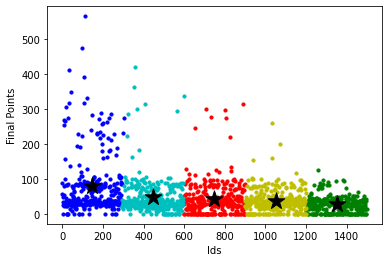

In [106]:
cluster_data = np.array(list(zip(identity, final_points)))

#Define 'cluster_num' for for number of clusters.

cluster_num = 5
kmeans = KMeans(cluster_num).fit(cluster_data)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
plt.ylabel('Final Points')
plt.xlabel('Ids')
colors = ['r', 'g','b','y','c']
for cluster_index in range(cluster_num) :
    sub_set = np.array([cluster_data[i] for i in range(len(cluster_data)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

In [127]:
# Final Points on the y axis, Cluster predicted on the x axis
from sklearn.metrics import confusion_matrix
identity =cluster['Groups on Final Points'].values
cluster_number= cluster['KmeansClusterPredicted_5Clusters'].values
confusion_matrix(identity,cluster_number,labels=[0,1,2,3,4])

array([[ 43,   2,   2,   4,  49],
       [273,  25, 101,   1,   0],
       [  0, 494, 259, 247,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]])

In [122]:
# Final Points on the y axis, Cluster predicted on the x axis
from sklearn.metrics import confusion_matrix
identity =cluster['Groups on Final Points'].values
cluster_number= cluster['KmeansClusterPredicted_6Clusters'].values
confusion_matrix(identity,cluster_number,labels=[0,1,2,3,4,5])

array([[  5,   2,   4,  38,   2,  49],
       [103,  89,   1, 205,   2,   0],
       [ 16, 259, 246,   0, 479,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

In [123]:
# Final Points on the y axis, Cluster predicted on the x axis
from sklearn.metrics import confusion_matrix
identity =cluster['Groups on Final Points'].values
cluster_number= cluster['KmeansClusterPredicted_7Clusters'].values
confusion_matrix(identity,cluster_number,labels=[0,1,2,3,4,5,6])

array([[  1,  38,   0,  17,   1,  37,   6],
       [  1, 205,   2,   0,  89,   0, 103],
       [246,   0, 479,   0, 259,   0,  16],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [124]:
# Final Points on the y axis, Cluster predicted on the x axis
from sklearn.metrics import confusion_matrix
identity =cluster['Groups on Final Points'].values
cluster_number= cluster['KmeansClusterPredicted_8Clusters'].values
confusion_matrix(identity,cluster_number,labels=[0,1,2,3,4,5,6,7])

array([[ 25,   0,   1,   1,  37,  14,  17,   5],
       [102,   1,  88,   1,   0, 130,   0,  78],
       [  0, 475, 259, 246,   0,   0,   0,  20],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

In [134]:
# Importing the dataset
cluster = pd.read_csv('sup_seg_1500.csv')

print('First look at the data set: ')
print(cluster.head())

First look at the data set: 
                           Companyname  Companyid  \
0            distripark.com Sp. z o.o.       1420   
1                    Same Chemicals BV       1286   
2        Chemische Fabrik Budenheim KG       7036   
3  Preparados Quimicos De Navarra S.L.        435   
4                            OOO SIBUR       1380   

  business_development_manager  page_views    offers    orders  \
0            Oksana Senchyshyn    1.000000  1.000000  0.118182   
1                Juan Alvarado    0.147317  0.578588  0.400000   
2               Florian Pagels    0.028130  0.161731  1.000000   
3                Juan Alvarado    0.499053  0.956720  0.445455   
4            Oksana Senchyshyn    0.173834  0.000000  0.000000   

   company_reply_rate  product_completness  total_order_value_in_euro  \
0            1.000000             0.727442                   0.048541   
1            0.558600             0.563014                   0.545682   
2            1.000000             0.

In [135]:
# Final Points on the y axis, Cluster predicted on the x axis
from sklearn.metrics import confusion_matrix
identity =cluster['Groups on Final Points'].values
cluster_number= cluster['cluster'].values
confusion_matrix(identity,cluster_number,labels=[0,1,2,3,4,5])

array([[  0,  51,  39,   2,   2,   6],
       [  0,   0, 278,  10, 112,   0],
       [  0,   0,   0, 503, 497,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]])